# **Lab 4: CRISP-DM Phase3, Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

file_path = '/content/drive/MyDrive/ public_emdat_project.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')

## **1. Handling Data‑Type Issues**

Incorrect data types can cause errors, slow things down, and lead to bad results.
Each column should have a data type that matches what it really is.

In [ ]:
df.dtypes

,0
DisNo.,object
Historic,object
Classification Key,object
Disaster Group,object
Disaster Subgroup,object
Disaster Type,object
Disaster Subtype,object
External IDs,object
Event Name,object
ISO,object


In [ ]:
# -------------------------------------------
# Find columns with mixed data types
# -------------------------------------------
# Semantic detection for object columns
for col in df.select_dtypes(include="object"):
  # Get non-null values as strings
  values = df[col].dropna().astype(str)

  # Check which values look like numbers (digits with optional decimal)
  is_numeric = values.str.match(r"^\d+(\.\d+)?$")

  # If column contains both numeric-looking AND non-numeric values
  # Check for mixed content by verifying:
  # 1. At least one value looks numeric (is_numeric.any())
  # 2. Not all values look numeric (~is_numeric.all())
  if is_numeric.any() and ~is_numeric.all():
    print(col + " --> has both numbers and text")

River Basin --> has both numbers and text


-- We are not interested in this column as it is not relevant to the objectives of our data mining project

In [ ]:
# -------------------------------------------
# Find non-numeric values in mixed columns
# -------------------------------------------

cols = ["Total Deaths","No. Injured",
"Total Affected", "Start Year",
"Start Month",
"Start Day",
"End Year",
"End Month",
"End Day"]
# Print values that cannot be converted to numbers)
for c in cols:
  print(f"{c} -->", df[c].dropna()[~pd.to_numeric(df[c], errors="coerce").notna()].unique())

Total Deaths --> []
No. Injured --> []
Total Affected --> []
Start Year --> []
Start Month --> []
Start Day --> []
End Year --> []
End Month --> []
End Day --> []


-- All ckecked columns contain only numeric values, with no non-numeric data found. This confirms that the data types for these columns are consistent and suitable for further analysis.

## **2. Handling Inconsistent Data**

Inconsistent data are values that *should* represent the same thing but appear in multiple, slightly‑different forms.  
Left unchecked, they fragment categories, distort statistics, and affect machine learning models.

In [ ]:
# -------------------------------------------
# Find inconsistencies in categorical features
# -------------------------------------------

# Define the list of categorical columns
categorical_features = ["Country", "Disaster Group", "Disaster Subgroup","Disaster Type"]

# Show sorted unique values for each categorical feature
for col in categorical_features:
  print(df[col].value_counts().sort_index())
  print("-" * 50)

Country
Afghanistan                  212
Albania                       30
Algeria                      101
American Samoa                 4
Angola                       100
                            ... 
Viet Nam                     227
Wallis and Futuna Islands      1
Yemen                         91
Zambia                        69
Zimbabwe                      85
Name: count, Length: 222, dtype: int64
--------------------------------------------------
Disaster Group
Natural          10045
Technological     5739
Name: count, dtype: int64
--------------------------------------------------
Disaster Subgroup
Biological                 924
Climatological             718
Extra-terrestrial            1
Geophysical                804
Hydrological              4531
Industrial accident        903
Meteorological            3067
Miscellaneous accident     924
Transport                 3912
Name: count, dtype: int64
--------------------------------------------------
Disaster Type
Air          

In [ ]:
# -------------------------------------------
# Standardize 'country' and clean other categorical columns
# -------------------------------------------

# 1) Mapping for known country misspellings/variants
country_map = {
    "viet nam":                    "vietnam",
    "wallis and futuna islands":   "wallis and futuna",
    "zimbabw":                     "zimbabwe"
}

# 2) List of other categorical columns to normalize
cat_cols = ["Disaster Group", "Disaster Subgroup", "Disaster Type"]

# 3) Apply normalization to 'country'
df["Country"] = (
    df["Country"]
      .str.strip()                # remove extra spaces
      .str.lower()                # unify to lowercase
      .replace(country_map)       # fix known variants
)

# 4) Apply simple cleaning (strip + lower) to the other categorical columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.str.strip().str.lower())

# 5) Verify results
print("🗂️ Unique countries after standardization:", df["Country"].nunique())
display(df["Country"].value_counts().sort_index().head(20))

for col in cat_cols:
    print(f"\nPreview of '{col}' after cleaning:")
    display(df[col].value_counts().sort_index().head(20))

🗂️ Unique countries after standardization: 222


,count
Country,
afghanistan,212
albania,30
algeria,101
american samoa,4
angola,100
anguilla,1
antigua and barbuda,3
argentina,116
armenia,11



Preview of 'Disaster Group' after cleaning:


,count
Disaster Group,
natural,10045
technological,5739



Preview of 'Disaster Subgroup' after cleaning:


,count
Disaster Subgroup,
biological,924
climatological,718
extra-terrestrial,1
geophysical,804
hydrological,4531
industrial accident,903
meteorological,3067
miscellaneous accident,924
transport,3912



Preview of 'Disaster Type' after cleaning:


,count
Disaster Type,
air,430
animal incident,1
chemical spill,23
collapse (industrial),148
collapse (miscellaneous),158
drought,408
earthquake,665
epidemic,894
explosion (industrial),458


## **3. Handling Missing Values**

***Based on what we found in Lab 3, we will apply Fix Strategies***
### **Fix Strategies** ⭐



In [ ]:
df.drop(columns=[
    "AID Contribution ('000 US$)", "External IDs", "Total Damage ('000 US$)",
    "Insured Damage ('000 US$)", "Reconstruction Costs ('000 US$)", "Origin",
    "Event Name", "Associated Types", "OFDA/BHA Response", "Latitude", "Longitude",
    "River Basin", "No. Homeless", "Admin Units",
    "Insured Damage, Adjusted ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)",
    "Total Damage, Adjusted ('000 US$)", "Magnitude Scale","No. Affected"
    ], inplace=True)

In [ ]:
df.isna().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
ISO,0
Country,0
Subregion,0


In [ ]:
df.dropna(subset=["Total Deaths","CPI","No. Injured","Total Affected","Location","Magnitude"], inplace=True)

In [ ]:
# -0.5 to +0.5      → Fairly symmetric  → Mean or median both okay
# > +0.5 or < -0.5  → Moderately skewed → Prefer median
# > +1 or < -1      → Highly skewed     → Strongly prefer median

numeric_cols = ["End Day", "Start Day","Start Month"]
df[numeric_cols].skew()

,0
End Day,-0.026198
Start Day,-0.052640
Start Month,-0.117093


In [ ]:
df["Start Day"] = df["Start Day"].fillna(df["Start Day"].mean())

In [ ]:
df["End Day"] = df["End Day"].fillna(df["End Day"].mean())

In [ ]:
df.isna().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
ISO,0
Country,0
Subregion,0


In [ ]:
df.shape

(1054, 27)

## **4. Handling Outliers**


**Outlier Scenarios ❌:**

| Outlier          | Example in Disaster data                | Potential cause                    |
|------------------------|-------------------------------------|------------------------------------|
| **Numeric extremes**   | `Magnitude = 350,000`  | Data-entry error, rare event       |
| **Unrealistic High** | `No. Affected = 4,500,000`             | Reporting error, population miscount                   |
| **Negative impossibles** | `Total Deaths= -5`             | Logic or coding error                       |
| **Typo/Entry Errors**    | `Magnitude = 1000000` |  Extra zero, misplaced decimal point    |


**Fix Strategies ⭐:**

| **Feature** |  **Strategy**                         |
--------------------|-----------------------------------------|
| **Magnitude**          | Transformation |
| **Total Deaths**       |  Remove negatives   |
| **No. Injured**      | Cap values (Winsorize)|
| **No. Affected**         | Transformation |

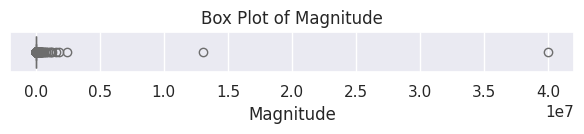

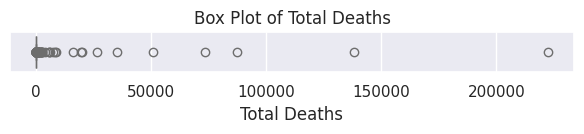

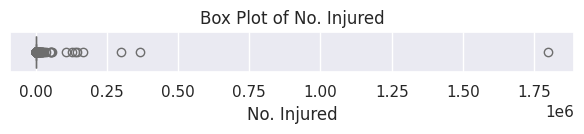

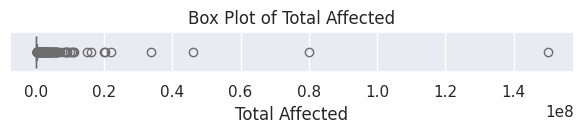

In [ ]:
# -------------------------------------------
# Visualize Outliers with Box-Plot
# -------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ["Magnitude", "Total Deaths"  ,"No. Injured", "Total Affected" ]

# Set plot style
sns.set(style="darkgrid")

# Plot boxplots
for col in features:
  plt.figure(figsize=(6, 1.5))
  sns.boxplot(x=df[col], color="salmon")
  plt.title(f"Box Plot of {col}")
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [ ]:
# Fix Outliers

import numpy as np

# Remove rows with negative values in count columns
count_cols = ['Total Deaths', 'No. Injured', 'Total Affected']
for col in count_cols:
    df = df[df[col] >= 0]  # Use col without quotes



In [ ]:
# Apply log transformation
df['Magnitude_transformed'] = np.log1p(df['Magnitude'])
df['Total Deaths_transformed'] = np.log1p(df['Total Deaths'])
df['No. Injured_transformed'] = np.log1p(df['No. Injured'])
df['Total Affected_transformed'] = np.log1p(df['Total Affected'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


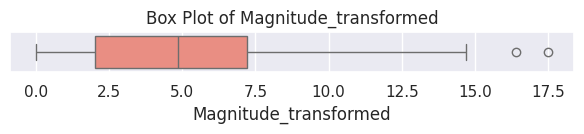

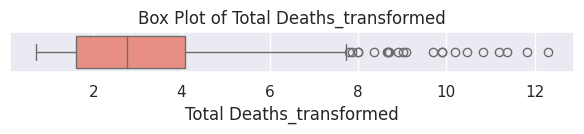

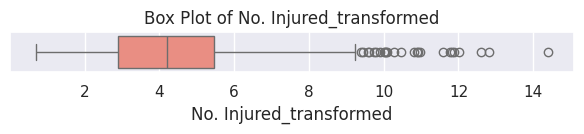

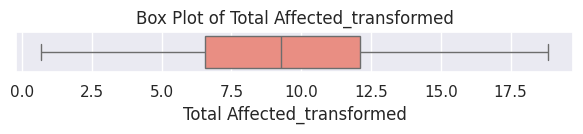

In [ ]:
# -------------------------------------------
# Visualize Outliers with Box-Plot
# -------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ["Magnitude_transformed", "Total Deaths_transformed"  ,"No. Injured_transformed", "Total Affected_transformed" ]

# Set plot style
sns.set(style="darkgrid")

# Plot boxplots
for col in features:
  plt.figure(figsize=(6, 1.5))
  sns.boxplot(x=df[col], color="salmon")
  plt.title(f"Box Plot of {col}")
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [ ]:
df.to_csv('newDataProject' , index=False)

##**Data Preprocessing ⭐**


**data cleaning Actions:**


**data cleaning actions:**

| Actions | Step | Columns | Method / Params | Before → After | Rationale |
|---|------|---------|-----------------|----------------|-----------|
| 1 | Handling Data‑Type Issues | No column need handle | `-` | - | - |
| 2 | Remove Negative Values | Total Deaths, No. Injured, Total Affected, Magnitude | Remove rows where value < 0 | Negatives present → None |Negative counts are invalid |
| 3 | Outliers Transformation| Total Deaths, No. Injured, Total Affected, Magnitude | Log transformation: np.log1p() |Highly skewed → Less skewed | Reduce impact of large outliers |
| 4 | Standardize country names | Country | .str.strip(), .str.lower(), .replace(country_map) | Mixed spelling/case → unified names | Ensure consistency|
| 5 | Clean other categorical columns | Disaster Group, Disaster Subgroup, Disaster Type | .str.strip(), .str.lower() | Mixed case/extra spaces → standardized | improve data quality |
| 6 | Verify standardization | Country, Disaster Group, Disaster Subgroup, Disaster Type |.nunique(), .value_counts() | Unchecked → Checked & confirmed | Confirm cleaning worked, spot issues early |
| 7 | Drop irrelevant columns |External IDs,Magnitude Scale, etc. | df.drop(columns=[...], inplace=True) | Many columns → Fewer columns | Remove columns not needed for analysis |
| 8 | Drop rows with critical missing values | Tota Deaths, Total Affected, CPI, No. Injured, No. Affected| df.dropna(subset=[...], inplace=True) | Rows with NaN in key cols → dropped | Ensure essential data is present for analysis |
| 9 | Impute missing days | Start Day, End Day | .fillna(df["Start Day"].mean()), .fillna(df["End Day"].mean())| NaN days → replaced with mean | Maintain time-related data by imputing small gaps |

# **Lab 5: Modeling (Frequent Pattern Mining)**

In [ ]:
# -------------------------------------------------------
# Step 1: Select attributes relevant for pattern mining
# -------------------------------------------------------

# Columns to include for pattern mining
pattern_cols = ['Disaster Group',
                'Disaster Subgroup',
                'Disaster Type',
                'Disaster Subtype',
                'Country',
                'Region',
                'Start Year',
                'End Year',
                "Total Deaths_transformed",
                "Total Affected",
                "Magnitude_transformed",
                "No. Injured_transformed",
                "Total Affected_transformed"]

# Create a new dataframe with selected attributes
df_mining = df[pattern_cols].copy()

# Preview
df_mining.dtypes

,0
Disaster Group,object
Disaster Subgroup,object
Disaster Type,object
Disaster Subtype,object
Country,object
Region,object
Start Year,int64
End Year,int64
Total Deaths_transformed,float64
Total Affected,float64


In [ ]:
df_mining.describe()


,Start Year,End Year,Total Deaths_transformed,Total Affected,Magnitude_transformed,No. Injured_transformed,Total Affected_transformed
count,1054.000000,1054.000000,1054.000000,1.054000e+03,1034.000000,1054.000000,1054.000000
mean,2009.792220,2009.805503,3.044262,7.728081e+05,5.221966,4.392933,9.205908
std,6.770102,6.777086,1.834675,5.772837e+06,3.527852,2.088617,3.565117
min,2000.000000,2000.000000,0.693147,1.000000e+00,0.000000,0.693147,0.693147
25%,2004.000000,2004.000000,1.609438,7.025000e+02,2.028148,2.890372,6.556067
50%,2009.000000,2009.000000,2.772589,1.080550e+04,4.867534,4.204693,9.287903
75%,2015.000000,2015.000000,4.077537,1.800315e+05,7.220596,5.449963,12.100893
max,2023.000000,2023.000000,12.313001,1.501460e+08,17.504390,14.403298,18.827119


In [ ]:
# -------------------------------------------------------
# Step 2: Discretize numerical columns into categories
# -------------------------------------------------------

# Total Deaths (extremely skewed, most values are near 0)
df_mining['Total Deaths_transformed'] = pd.cut(
    df_mining['Total Deaths_transformed'],
    bins=[-float('inf'), 0, 100, 1000, float('inf')],
    labels=['None', 'Low', 'Moderate', 'High']
)

# Total Affected (very large values, highly skewed)
df_mining['Total Affected'] = pd.cut(
    df_mining['Total Affected'],
    bins=[-float('inf'), 0, 1_000_000, 10_000_000, float('inf')],
    labels=['None', 'Low', 'Moderate', 'High']
)

# No. Injured (transformed)
df_mining['No. Injured_transformed'] = pd.cut(
    df_mining['No. Injured_transformed'],
    bins=[-float('inf'), 0, 5, 10, float('inf')],
    labels=['None', 'Low', 'Moderate', 'High']
)

# Total Affected (transformed)
df_mining['Total Affected_transformed'] = pd.cut(
    df_mining['Total Affected_transformed'],
    bins=[-float('inf'), 0, 5, 10, float('inf')],
    labels=['None', 'Low', 'Moderate', 'High']
)

# Magnitude (e.g. earthquake or disaster scale)
df_mining['Magnitude_transformed'] = pd.cut(
    df_mining['Magnitude_transformed'],
    bins=[-float('inf'), 2, 6, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# Start Year → into Decades
df_mining['Start Year'] = pd.cut(
    df_mining['Start Year'],
    bins=[1999, 2009, 2019, 2025],
    labels=['2000s', '2010s', '2020s']
)

# End Year → same decade bins
df_mining['End Year'] = pd.cut(
    df_mining['End Year'],
    bins=[1999, 2009, 2019, 2025],
    labels=['2000s', '2010s', '2020s']
)

# Final check: print dtypes
print("✅ Numeric attributes converted to categorical successfully!")
display(df_mining.dtypes)

✅ Numeric attributes converted to categorical successfully!


,0
Disaster Group,object
Disaster Subgroup,object
Disaster Type,object
Disaster Subtype,object
Country,object
Region,object
Start Year,category
End Year,category
Total Deaths_transformed,category
Total Affected,category


In [ ]:
# -------------------------------------------------------
# Install necessary packages
# -------------------------------------------------------
!pip install mlxtend

In [ ]:
# -------------------------------------------------------
# Step 3: Transform the dataset into a transaction format
# -------------------------------------------------------

# Create a list of transactions
# Each row becomes a list like: ['Column1 = Value1', 'Column2 = Value2', ...]
transactions = [
    [f"{col} = {val}" for col, val in zip(df_mining.columns, row)]
    for row in df_mining.values.tolist()
]

# Preview the first 3 transactions
print("📦 First 3 transactions preview:")
for t in transactions[:3]:
    print(t)

📦 First 3 transactions preview:
['Disaster Group = natural', 'Disaster Subgroup = geophysical', 'Disaster Type = earthquake', 'Disaster Subtype = Ground movement', 'Country = china', 'Region = Asia', 'Start Year = 2000s', 'End Year = 2000s', 'Total Deaths_transformed = Low', 'Total Affected = Moderate', 'Magnitude_transformed = Low', 'No. Injured_transformed = Moderate', 'Total Affected_transformed = High']
['Disaster Group = natural', 'Disaster Subgroup = geophysical', 'Disaster Type = earthquake', 'Disaster Subtype = Ground movement', 'Country = china', 'Region = Asia', 'Start Year = 2000s', 'End Year = 2000s', 'Total Deaths_transformed = Low', 'Total Affected = Low', 'Magnitude_transformed = Low', 'No. Injured_transformed = Low', 'Total Affected_transformed = Moderate']
['Disaster Group = natural', 'Disaster Subgroup = geophysical', 'Disaster Type = earthquake', 'Disaster Subtype = Ground movement', 'Country = iran (islamic republic of)', 'Region = Asia', 'Start Year = 2000s', 'End 

In [ ]:
# -------------------------------------------------------
# Step 4: One-Hot Encode the transactions
# -------------------------------------------------------

# Import TransactionEncoder from mlxtend to convert transactions into one-hot format
from mlxtend.preprocessing import TransactionEncoder

# Initialize the encoder
te = TransactionEncoder()

# Fit the encoder to the transaction data and transform it into a boolean matrix
te_ary = te.fit(transactions).transform(transactions)

# Convert the boolean matrix into a Pandas DataFrame
# Each column represents a unique item (e.g., "Country = china")
# Each row represents a transaction with True/False for each item
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows to verify the encoding
df_encoded.head()

,Country = afghanistan,Country = albania,Country = algeria,Country = american samoa,Country = angola,Country = argentina,Country = australia,Country = austria,Country = azerbaijan,Country = bangladesh,...,Start Year = 2000s,Start Year = 2010s,Start Year = 2020s,Total Affected = High,Total Affected = Low,Total Affected = Moderate,Total Affected_transformed = High,Total Affected_transformed = Low,Total Affected_transformed = Moderate,Total Deaths_transformed = Low
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True


In [ ]:
# -------------------------------------------------------
# Step 5: Apply a frequent pattern mining algorithm
# -------------------------------------------------------

# Import algorithms to find frequent itemsets
from mlxtend.frequent_patterns import apriori, fpgrowth

# Set the minimum support threshold (e.g., 0.3 = 30%)
min_support = 0.3

# Option 1: Apply Apriori algorithm
frequent_itemsets_apriori = apriori(
    df_encoded,               # use one-hot encoded DataFrame
    min_support=min_support,  # apply minimum support threshold
    use_colnames=True         # ensures that the output uses actual item names instead of column indices
)

# Option 2: Apply FP-Growth algorithm
frequent_itemsets_fpgrowth = fpgrowth(
    df_encoded,
    min_support=min_support,
    use_colnames=True
)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# -------------------------------------------------------
# Step 6: Filter and inspect frequent itemsets.
# -------------------------------------------------------

# Filter 3-itemsets from Apriori output
apriori_3_itemsets = frequent_itemsets_apriori[
    frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) == 3) # keep only itemsets that contain at least 2 items
].sort_values(by='support', ascending=False)

# Filter 3-itemsets from FP-Growth output
fpgrowth_3_itemsets = frequent_itemsets_fpgrowth[
    frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: len(x) == 3)
].sort_values(by='support', ascending=False)

# Temporarily allow wider column display
pd.set_option('display.max_colwidth', None)

# Display top 5 from each
print(f"Total 3-itemsets from Apriori: {len(apriori_3_itemsets)}")
print("Top five 3-itemsets:")
display(apriori_3_itemsets.head(5))

print(f"\n\nTotal 3-itemsets from FP-Growth: {len(fpgrowth_3_itemsets)}")
print("Top five 3-itemsets:")
display(fpgrowth_3_itemsets.head(5))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total 3-itemsets from Apriori: 81
Top five 3-itemsets:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
114,0.894687,"(Disaster Group = natural, Total Deaths_transformed = Low, Total Affected = Low)"
103,0.655598,"(Disaster Group = natural, Total Deaths_transformed = Low, No. Injured_transformed = Low)"
148,0.626186,"(Total Deaths_transformed = Low, Total Affected = Low, No. Injured_transformed = Low)"
101,0.621442,"(Disaster Group = natural, Total Affected = Low, No. Injured_transformed = Low)"
107,0.604364,"(Disaster Group = natural, Total Deaths_transformed = Low, Region = Asia)"




Total 3-itemsets from FP-Growth: 81
Top five 3-itemsets:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
156,0.894687,"(Disaster Group = natural, Total Deaths_transformed = Low, Total Affected = Low)"
160,0.655598,"(Disaster Group = natural, Total Deaths_transformed = Low, No. Injured_transformed = Low)"
161,0.626186,"(Total Deaths_transformed = Low, Total Affected = Low, No. Injured_transformed = Low)"
162,0.621442,"(Disaster Group = natural, Total Affected = Low, No. Injured_transformed = Low)"
22,0.604364,"(Disaster Group = natural, Total Deaths_transformed = Low, Region = Asia)"


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## **3. Generating Association Rules** ➰:

In [ ]:
# Step 7: Generate association rules from frequent itemsets
# -------------------------------------------------------

# Import library to generate association rules
from mlxtend.frequent_patterns import association_rules

# Choose which frequent itemsets to use (Apriori or FP-Growth)
frequent_itemsets = frequent_itemsets_apriori  # or frequent_itemsets_fpgrowth

# Generate association rules using confidence as the evaluation metric
rules = association_rules(
    frequent_itemsets,          # Input: frequent itemsets
    metric="confidence",        # Rule evaluation metric
    min_threshold=0.7          # Minimum confidence threshold (e.g., 60%)
)

# Preview sample association rules with key columns
print("Total # of association rules: ", len(rules))
print("Association rules preview: ")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total # of association rules:  1061
Association rules preview: 


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,support,confidence,lift
0,(Disaster Subgroup = geophysical),(Disaster Group = natural),0.360531,1.000000,1.004766
1,(Disaster Subgroup = meteorological),(Disaster Group = natural),0.348197,1.000000,1.004766
2,(Disaster Subtype = Ground movement),(Disaster Group = natural),0.342505,1.000000,1.004766
3,(Disaster Type = earthquake),(Disaster Group = natural),0.360531,1.000000,1.004766
4,(End Year = 2000s),(Disaster Group = natural),0.528463,0.992870,0.997602
5,(End Year = 2010s),(Disaster Group = natural),0.356736,0.997347,1.002101
6,(Magnitude_transformed = Moderate),(Disaster Group = natural),0.518975,1.000000,1.004766
7,(No. Injured_transformed = Low),(Disaster Group = natural),0.655598,0.992816,0.997548
8,(No. Injured_transformed = Moderate),(Disaster Group = natural),0.323529,1.000000,1.004766
9,(Region = Asia),(Disaster Group = natural),0.604364,0.995313,1.000057


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Step 8: Filter and sort rules based on confidence and lift
# -------------------------------------------------------

# Filter rules to keep only strong and interesting ones
# Criteria: confidence > 0.7 and lift > 1.2
strong_rules = rules[
    (rules['confidence'] > 0.7) &
    (rules['lift'] > 1.2)
]

# Sort the filtered rules by descending lift
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Preview sample strong rules with key columns
print("Total # of strong association rules: ", len(strong_rules))
print("Strong sssociation rules preview: ")
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total # of strong association rules:  531
Strong sssociation rules preview: 


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
573,"(Disaster Type = earthquake, Total Affected = Low)","(Disaster Subgroup = geophysical, Disaster Subtype = Ground movement)",0.324478,0.952646,2.78141
985,"(Disaster Type = earthquake, Disaster Group = natural, Disaster Subgroup = geophysical, Total Affected = Low)","(Total Deaths_transformed = Low, Disaster Subtype = Ground movement)",0.324478,0.952646,2.78141
375,"(Disaster Type = earthquake, Total Affected = Low, Disaster Group = natural)",(Disaster Subtype = Ground movement),0.324478,0.952646,2.78141
702,"(Disaster Type = earthquake, Total Affected = Low)","(Disaster Group = natural, Disaster Subgroup = geophysical, Disaster Subtype = Ground movement)",0.324478,0.952646,2.78141
981,"(Disaster Group = natural, Total Deaths_transformed = Low, Disaster Subtype = Ground movement, Disaster Subgroup = geophysical)","(Disaster Type = earthquake, Total Affected = Low)",0.324478,0.947368,2.78141


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Step 9: Filter rules based on a specific antecedent column
# -------------------------------------------------------


target_column = 'Disaster Subgroup =' # The attribute or category to focus on in the antecedent

# Filter rules where the antecedent contains any item from the target column
rules_with_subgroup = rules[
    rules['antecedents'].apply(lambda x: any(target_column in item for item in x))
].sort_values(by='lift', ascending=False)

# Preview sample rules with key columns
print("Total # of rules: ", len(rules_with_subgroup))
print("Rules preview: ")
rules_with_subgroup[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

Total # of rules:  244
Rules preview: 


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
187,"(Disaster Subgroup = geophysical, Total Affected = Low)",(Disaster Subtype = Ground movement),0.324478,0.952646,2.78141
568,"(Disaster Type = earthquake, Disaster Subgroup = geophysical, Total Affected = Low)",(Disaster Subtype = Ground movement),0.324478,0.952646,2.78141
310,"(Disaster Group = natural, Disaster Subgroup = geophysical, Total Affected = Low)",(Disaster Subtype = Ground movement),0.324478,0.952646,2.78141
316,"(Disaster Subgroup = geophysical, Total Affected = Low)","(Disaster Group = natural, Disaster Subtype = Ground movement)",0.324478,0.952646,2.78141
575,"(Disaster Subgroup = geophysical, Total Affected = Low)","(Disaster Type = earthquake, Disaster Subtype = Ground movement)",0.324478,0.952646,2.78141


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## **4. Visualizing Association Rules as a Network Graph** 📊:

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

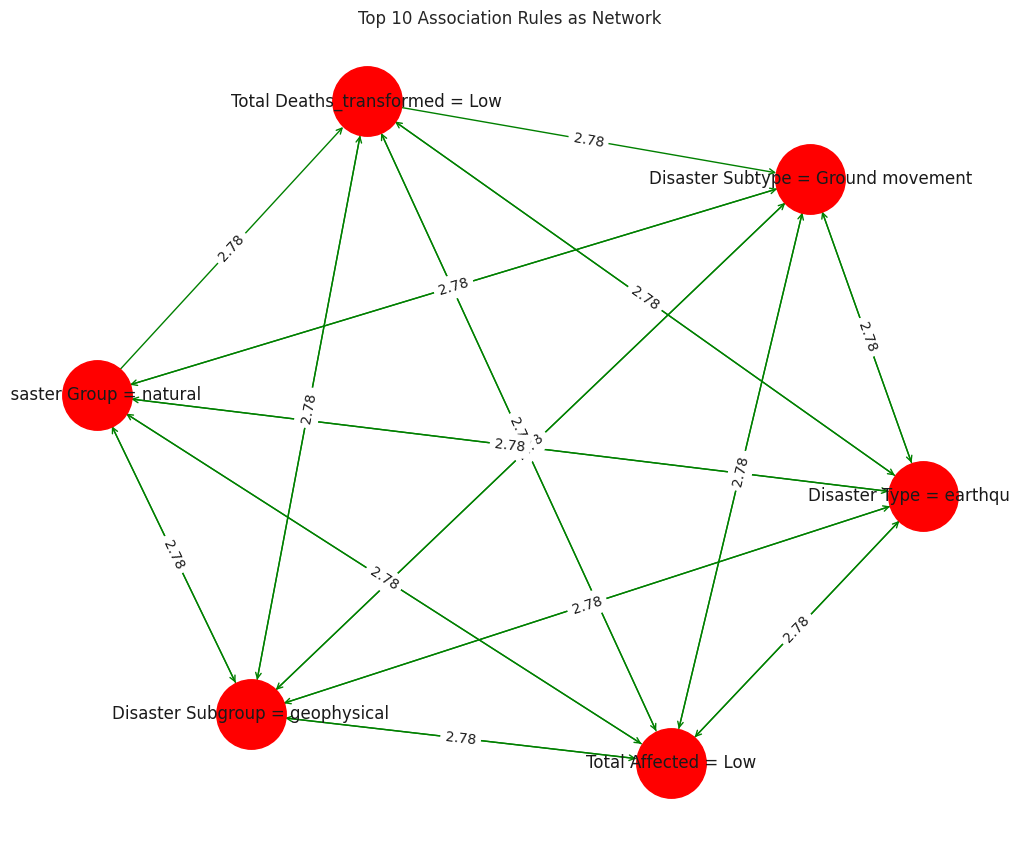

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# -------------------------------------------------------
# Visualizing Association Rules as a Network Graph
# -------------------------------------------------------

# IImport libraries for visualizing association rules as a network graph
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges (top 10 strong rules)
for _, row in strong_rules.head(10).iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=24)   # Used spring layout with fixed arrangement

# Draw the nodes and edges
nx.draw(
    G,              # The graph object
    pos,            # Node positions
    with_labels=True,            # Show labels on nodes
    node_color='red',      # Node fill color
    node_size=2500,              # Size of each node
    font_size=12,                # Text label size
    font_weight='normal',          # Make labels bold
    arrows=True,                 # Show arrowheads
    arrowstyle='->',             # Arrow type
    edge_color='green'            # Edge line color
)

# Draw the edge labels (lift values) on the graph
edge_labels = {                         # Dictionary of labels for each edge
    (u, v): f"{d['weight']:.2f}"        # Format lift value as a string like '1.42'
    for u, v, d in G.edges(data=True)   # Iterate over all edges with their data
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Finalize and display the plot
plt.title("Top 10 Association Rules as Network")
plt.axis('off')         # Remove axis ticks and border
plt.tight_layout()      # Auto-adjust layout for clarity
plt.show()

#**Insights and Findings from Association Rules**:

##**step 1:**

* **Selecting Important Attributes**

 We chose specific columns related to disasters, such as disaster type, location, year, and impact measures like deaths and affected people. This helps us focus on the most relevant information for finding useful patterns.  

*   **Converting Numbers into Categories**

    Since some numbers (like total deaths or affected) had very uneven values, we grouped them into categories like ‘None’, ‘Low’, ‘Moderate’, and ‘High’. We also grouped years into decades (e.g., 2000s, 2010s).
    This makes the data easier to analyze and understand, and it fits better with the pattern mining methods we use.
*   **Changing Data into Yes/No Format**

    We transformed the data so each row shows whether a certain attribute is present or not (for example, whether the disaster happened in Afghanistan or if deaths were ‘Low’). This format is needed for the mining algorithms to work correctly.


  **After this process,The data was ready and clean for mining patterns and association rules**


  ## **step 2:**
   

*   **Frequent Itemset Discovery**

    we applied both the Apriori and FP-Growth algorithms to the prepared dataset to identify frequent patterns, we focused on discovering itemsets that appear in at least 30% of all disaster cases

*   **Both algorithms produced consistent results, the most common patterns found were:**

* -  (Total Affected = Low, Total Deaths_transformed = Low, Disaster Group = natural)

*  - (No. Injured_transformed = Low, Total Deaths_transformed = Low, Disaster Group = natural)
     
*   - (No. Injured_transformed = Low, Total Affected = Low, Total Deaths_transformed = Low)

*   - (No. Injured_transformed = Low, Total Affected = Low, Disaster Group = natural)


* - (Total Deaths_transformed = Low, Disaster Group = natural, Region = Asia)


## **step 3:**


*   Generate Association Rules
*   Filter and Sort Rules by Confidence and Lift

**Filtering the association rules for those with strong confidence and lift revealed meaningful and interesting patterns within the disaster data.**

Example patterns found:
* -  Meteorological disasters are highly associated with storms
*  - Low deaths are also linked with meteorological storms

* Focus on Rules with a Specific Antecedent

  Further filtered the rules to focus on those where the antecedent contains a specific attribute ("Disaster Subgroup").






In [ ]:
df["damage_level"] = pd.qcut(
    df["Total Affected"],
    q=3,
    labels=["low","medium","high"]
)


df["Country"] = df["Country"].str.lower().str.replace(" ","_") \
                + "_" \
                + df["damage_level"].astype(str)

# 3)(pattern mining)
pattern_cols = [
    "Disaster Group",
    "Disaster Subgroup",
    "Disaster Type",
    "Disaster Subtype",
    "Region",
    "Start Year",
    "End Year"
]

df_mining = df[pattern_cols + ["Country"]].copy()


print(df_mining["Country"].value_counts().head(20))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Country
philippines_high                     63
china_high                           56
united_states_of_america_low         39
china_medium                         35
japan_medium                         33
indonesia_medium                     29
japan_low                            25
taiwan_(province_of_china)_low       21
indonesia_high                       20
pakistan_high                        18
indonesia_low                        18
vietnam_high                         17
iran_(islamic_republic_of)_medium    16
china_low                            13
philippines_medium                   13
afghanistan_medium                   13
india_high                           13
pakistan_low                         12
japan_high                           12
iran_(islamic_republic_of)_low       12
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Define target and features
target_col = 'Total Affected'
features = ['Disaster Group', 'Disaster Subgroup', 'Country']

# Step 2: Create copies
X = df[features].copy()
y_raw = df[target_col]

# Step 3: Bin the target into categories (Low, Moderate, High)
# (You can adjust thresholds based on your data distribution)
y = pd.cut(
    y_raw,
    bins=[-float('inf'), 100000, 1000000, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# Step 4: One-Hot Encode categorical features
X = pd.get_dummies(X, columns=['Disaster Subgroup', 'Disaster Group', 'Country'])

# Step 5: Encode the labels (Low = 0, Moderate = 1, High = 2)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 6: Check class distribution
class_counts = pd.Series(y).value_counts()
print("Class distribution in target variable:\n", class_counts)

# Step 7: Handle low-class cases
if (class_counts < 2).any():
    print("⚠️ Some classes have fewer than 2 instances. Consider adjusting bins or filtering.")
else:
    # Step 8: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=1,
        stratify=y
    )
    print("✅ Data split completed successfully.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Class distribution in target variable:
 1    740
2    208
0    106
Name: count, dtype: int64
✅ Data split completed successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


- Decision Tree Accuracy: 78.67 %

- Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.52      0.51        21
         Low       0.84      0.98      0.91       148
    Moderate       0.59      0.24      0.34        42

    accuracy                           0.79       211
   macro avg       0.64      0.58      0.59       211
weighted avg       0.76      0.79      0.75       211


- Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

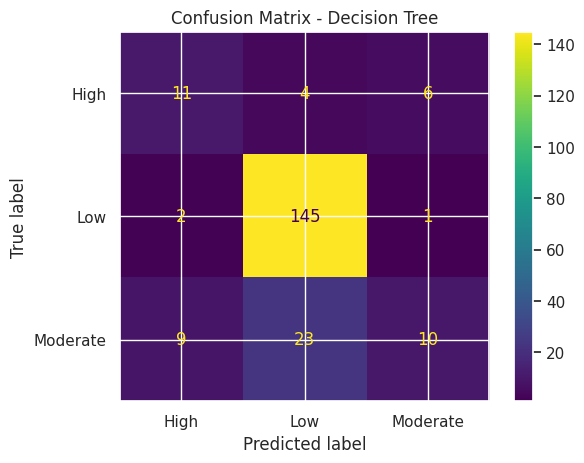

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Instantiate the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=6,
    criterion='entropy',
    random_state=1
)

# Step 2: Train the model
tree.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_tree = tree.predict(X_test)

# Step 4: Evaluation
print("\n- Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_tree) * 100, 2), "%")

print("\n- Classification Report:\n", classification_report(
    y_test, y_pred_tree,
    target_names=le.classes_  # أو ['Low', 'Moderate', 'High'] إذا le مو موجود
))

print("\n- Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

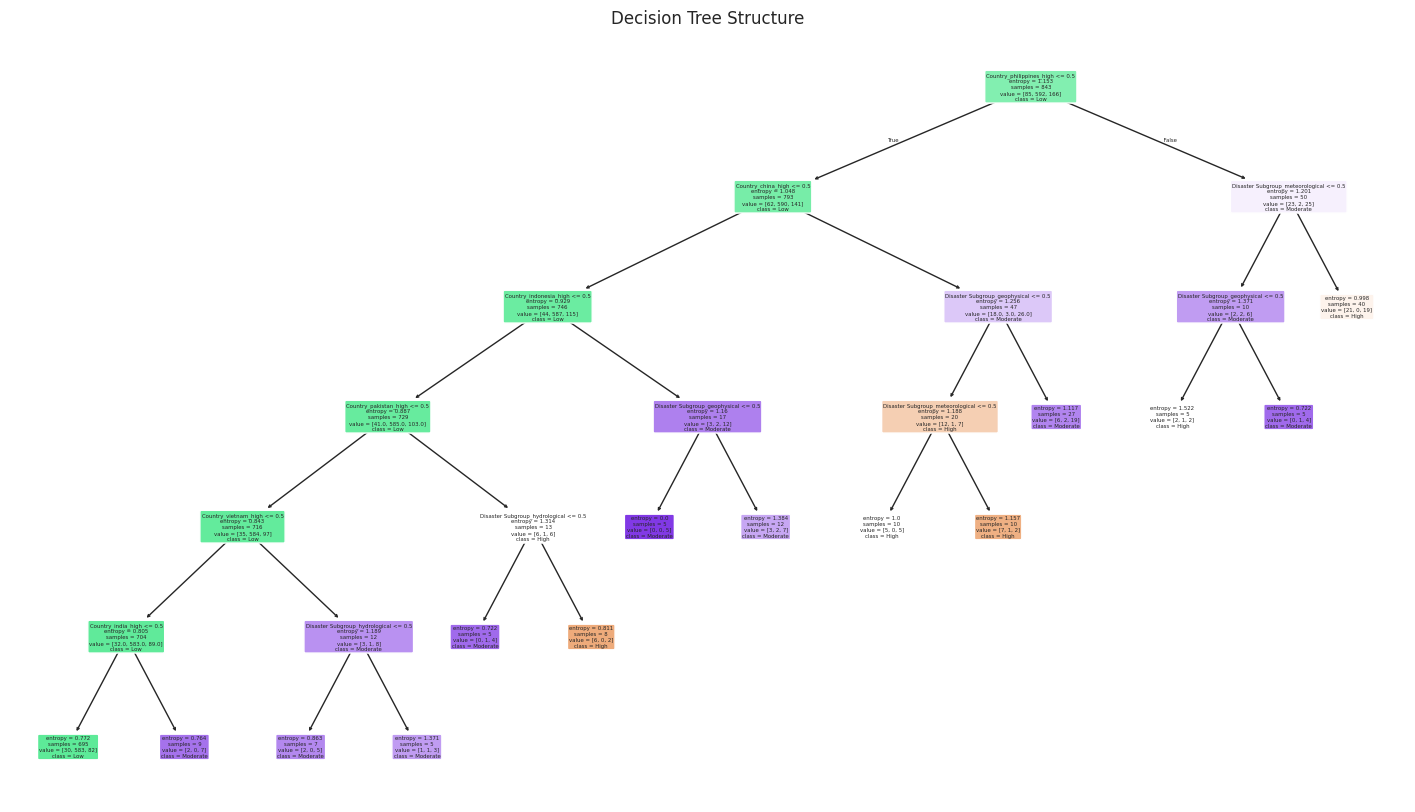

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# -------------------------------------------------------
# Visualize the Decision Tree 🌳
# -------------------------------------------------------

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size to make the tree easier to read
plt.figure(figsize=(18, 10))

# Plot the trained Decision Tree model
plot_tree(
    tree,                      # Your trained decision tree model
    feature_names=X.columns,  # Names of input features (used as split criteria)
    class_names=le.classes_,  # Class labels (e.g., ['Low', 'Moderate', 'High'])
    filled=True,              # Fill nodes with colors based on purity
    rounded=True              # Rounded box shapes for better aesthetics
)

# Add a title and display the tree
plt.title("Decision Tree Structure")
plt.show()

##**3. Naive Bayes Classifier**

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


- Naive Bayes Accuracy: 72.04 %

- Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.90      0.40        21
           1       1.00      0.85      0.92       148
           2       0.64      0.17      0.26        42

    accuracy                           0.72       211
   macro avg       0.63      0.64      0.53       211
weighted avg       0.85      0.72      0.74       211


- Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

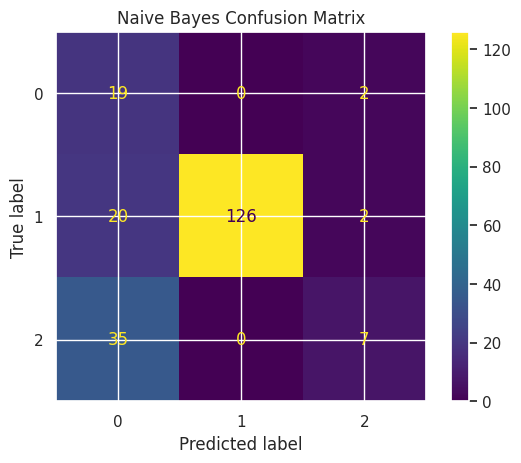

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# -------------------------------------------------------
# Train and Evaluate a Naive Bayes Classifier
# -------------------------------------------------------

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Instantiate the Naive Bayes model
nb = GaussianNB()   # Use GaussianNB for continuous features

# Step 2: Fit the model to the training data
nb.fit(X_train, y_train)

# Step 3: Predict class labels on the test data
y_pred_nb = nb.predict(X_test)

# Step 4: Evaluate the model's performance

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_nb)
print("\n- Naive Bayes Accuracy:", round(accuracy * 100, 2), "%")

# Detailed performance report
print("\n- Classification Report:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# Confusion matrix for class-wise performance
print("\n- Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


- Naive Bayes Accuracy: 72.04 %

- Classification Report:
               precision    recall  f1-score   support

        High       0.26      0.90      0.40        21
         Low       1.00      0.85      0.92       148
    Moderate       0.64      0.17      0.26        42

    accuracy                           0.72       211
   macro avg       0.63      0.64      0.53       211
weighted avg       0.85      0.72      0.74       211


- Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

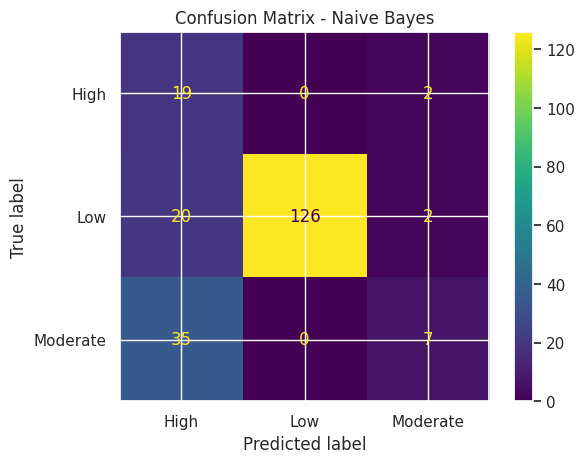

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# -------------------------------------------------------
# Train and Evaluate a Naive Bayes Classifier
# -------------------------------------------------------

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Instantiate the Naive Bayes model
nb = GaussianNB()  # Use GaussianNB for continuous features

# Step 2: Train the model
nb.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_nb = nb.predict(X_test)

# Step 4: Evaluation
print("\n- Naive Bayes Accuracy:", round(accuracy_score(y_test, y_pred_nb) * 100, 2), "%")

# If you have a label encoder 'le', use le.classes_. Otherwise, replace with your class names (e.g., ['Low', 'Moderate', 'High'])
print("\n- Classification Report:\n", classification_report(
    y_test, y_pred_nb,
    target_names=le.classes_  # or ['Low', 'Moderate', 'High'] if le is not available
))

print("\n- Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## **4. Comparing Results Across Models**

In [ ]:
# -------------------------------------------------------
# Perform 5-Fold Cross-Validation to Compare Models
# -------------------------------------------------------

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the models
tree = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

# Evaluate Decision Tree model using 5-fold cross-validation
scores_tree = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

# Evaluate Naive Bayes model using 5-fold cross-validation
scores_nb = cross_val_score(nb, X, y, cv=5, scoring='accuracy')

# Print the average cross-validated accuracy for each model
print("Decision Tree - Cross-validated Accuracy:", round(scores_tree.mean() * 100, 2), "%")
print("Naive Bayes   - Cross-validated Accuracy:", round(scores_nb.mean() * 100, 2), "%")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Decision Tree - Cross-validated Accuracy: 82.83 %
Naive Bayes   - Cross-validated Accuracy: 69.17 %


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag